In [ ]:
import numpy as np
import pandas as pd
import os 
import librosa
import wave
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import*
from tensorflow.keras.optimizers import RMSprop


In [ ]:
from google.colab import drive
drive.mount('/content/ndrive')

Drive already mounted at /content/ndrive; to attempt to forcibly remount, call drive.mount("/content/ndrive", force_remount=True).


In [ ]:
wav_file_name="/content/ndrive/MyDrive/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav"
def extract_mfcc (wav_file_name):
  y, sr =librosa.load(wav_file_name)
  mfccs= np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40). T,axis=0)
  return mfccs





#This function extracts mfcc features and obtain the mean of each dimension

#Input: path_to_wav_file

#Output: mfcc_features"

[] ##### load radvess speech data #####

radvess_speech_labels = [] # to save extracted label/file 
ravdess_speech_data = [] # to save extracted features/file 

for dirname, _, filenames in os.walk("/content/ndrive/MyDrive/audio_speech_actors_01-24"):

  for filename in filenames:
     #print (os.path.join(dirname, filename)) 
     radvess_speech_labels.append(int (filename [7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label 
     wav_file_name = os.path.join(dirname, filename)

     ravdess_speech_data.append(extract_mfcc (wav_file_name))
print("finish loading dataset")






    
 # extract MFCC features/file


   






finish loading dataset


In [ ]:
ravdess_speech_data

[array([-6.8739594e+02,  4.6098209e+01,  2.4876256e+00,  6.6316571e+00,
         1.7884074e+00, -2.9258611e+00, -6.8805814e+00, -4.6066375e+00,
        -5.1542544e+00,  2.9401556e-01, -3.8664083e+00, -6.6063790e+00,
         1.1844170e+00, -3.9030523e+00,  1.7243217e+00, -5.7591586e+00,
        -3.6097391e+00, -1.9350277e+00, -5.6978979e+00, -3.0305989e+00,
        -3.1378837e+00, -1.6641772e+00, -4.3458533e+00, -9.9640590e-01,
        -6.0919852e+00, -1.2945715e-02, -3.3436613e+00,  2.1373467e+00,
         1.1428566e+00,  3.5331392e+00, -5.3107020e-02, -1.1708409e+00,
        -1.9553068e+00, -5.6995302e-01,  1.5453169e+00,  3.2394164e+00,
         3.4309659e+00,  3.8074327e+00, -4.1123539e-01,  4.0727811e+00],
       dtype=float32),
 array([-6.8789160e+02,  5.2303005e+01,  1.6305006e+00,  8.3848369e-01,
         4.3230219e+00, -1.8077897e+00, -8.3043060e+00, -1.0773336e+01,
        -9.6196251e+00, -3.1132689e-01, -1.8227680e+00, -8.2777424e+00,
        -1.6907357e+00, -1.1215171e+00, 

In [ ]:
#### convert data and label to array

ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array 
ravdess_speech_label_array = np.array(radvess_speech_labels)

ravdess_speech_label_array.shape # get tuple of array dimensions

#sus make categorical labels

labels_categorical = to_categorical (ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix 
labels_categorical.shape



(1440, 8)

In [ ]:
ravdess_speech_data_array


array([[-6.8739594e+02,  4.6098209e+01,  2.4876256e+00, ...,
         3.8074327e+00, -4.1123539e-01,  4.0727811e+00],
       [-6.8789160e+02,  5.2303005e+01,  1.6305006e+00, ...,
         2.4244096e+00, -3.5580689e-01,  4.4196115e+00],
       [-6.7967957e+02,  4.8117741e+01, -1.3433049e+00, ...,
         2.0844076e+00, -1.6989791e+00,  5.0396305e-01],
       ...,
       [-5.3077039e+02,  5.8192909e+01, -1.6139076e+01, ...,
         7.2444022e-01,  9.6535957e-01,  4.2686682e+00],
       [-4.5646182e+02,  4.7076839e+01, -1.2145891e+01, ...,
        -3.9638630e-01,  1.8720751e-01,  4.4477472e+00],
       [-5.5462219e+02,  5.1871590e+01, -5.9014735e+00, ...,
        -1.5099245e-01,  1.0836933e+00,  4.1676912e+00]], dtype=float32)

In [ ]:
 ravdess_speech_data_array


array([[-6.8739594e+02,  4.6098209e+01,  2.4876256e+00, ...,
         3.8074327e+00, -4.1123539e-01,  4.0727811e+00],
       [-6.8789160e+02,  5.2303005e+01,  1.6305006e+00, ...,
         2.4244096e+00, -3.5580689e-01,  4.4196115e+00],
       [-6.7967957e+02,  4.8117741e+01, -1.3433049e+00, ...,
         2.0844076e+00, -1.6989791e+00,  5.0396305e-01],
       ...,
       [-5.3077039e+02,  5.8192909e+01, -1.6139076e+01, ...,
         7.2444022e-01,  9.6535957e-01,  4.2686682e+00],
       [-4.5646182e+02,  4.7076839e+01, -1.2145891e+01, ...,
        -3.9638630e-01,  1.8720751e-01,  4.4477472e+00],
       [-5.5462219e+02,  5.1871590e+01, -5.9014735e+00, ...,
        -1.5099245e-01,  1.0836933e+00,  4.1676912e+00]], dtype=float32)

In [ ]:
ravdess_speech_data_array.shape

(1440, 40)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array), labels_categorical, test_size=0.20, random_state=9)

In [ ]:
# Split the training, validating, and testing sets 
number_of_samples=ravdess_speech_data_array.shape[0]
training_samples =int (number_of_samples*0.8) 
validation_samples=int(number_of_samples*0.1) 
test_samples =int (number_of_samples*0.1)

In [ ]:
def create_model_LSTM():
   model=Sequential()
   model.add(LSTM(128, return_sequences=False, input_shape=(40, 1))) 
   model.add(Dense(64))
   model.add(Dropout (0.4))
   model.add(Activation("relu")) 
   model.add(Dense(32))
   model.add(Dropout (0.4))
   model.add(Activation("relu")) 
   model.add(Dense(8))
   model.add(Activation("softmax"))

   model.compile(loss='categorical_crossentropy',optimizer ="Adam", metrics=['accuracy'])
   return model




   #configures the model for training



In [ ]:
w=np.expand_dims (ravdess_speech_data_array[:training_samples],-1)


In [ ]:
w.shape

(1152, 40, 1)

In [ ]:
# #ass train using LSTM model
# model_A= create_model_LSTM() 
# history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data= (np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples]),epochs=130,shuffle=True)
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=130, shuffle=True)


36/36 [==============================] - 7s 73ms/step - loss: 2.0811 - accuracy: 0.1302 - val_loss: 2.0541 - val_accuracy: 0.1250
Epoch 2/130
36/36 [==============================] - 2s 54ms/step - loss: 2.0580 - accuracy: 0.1458 - val_loss: 2.0342 - val_accuracy: 0.1250
Epoch 3/130
36/36 [==============================] - 2s 54ms/step - loss: 2.0239 - accuracy: 0.1944 - val_loss: 2.0166 - val_accuracy: 0.2500
Epoch 4/130
36/36 [==============================] - 2s 53ms/step - loss: 1.9879 - accuracy: 0.1944 - val_loss: 1.9427 - val_accuracy: 0.1944
Epoch 5/130
36/36 [==============================] - 2s 55ms/step - loss: 1.9964 - accuracy: 0.1997 - val_loss: 2.0087 - val_accuracy: 0.1389
Epoch 6/130
36/36 [==============================] - 4s 102ms/step - loss: 1.9731 - accuracy: 0.2127 - val_loss: 1.9536 - val_accuracy: 0.2361
Epoch 7/130
36/36 [==============================] - 2s 66ms/step - loss: 1.9516 - accuracy: 0.2335 - val_loss: 1.9510 - val_accuracy: 0.2361
Epoch 8/130
36/36

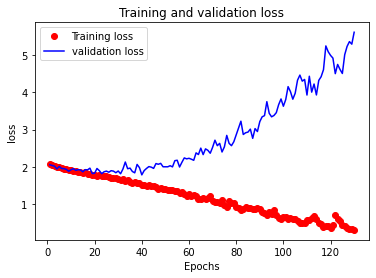

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

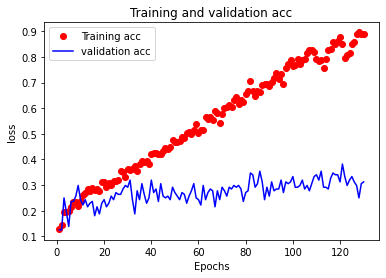

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


plt.plot(epochs,acc,'ro',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:], -1), labels_categorical[training_samples+validation_samples:])


5/5 [==============================] - 0s 54ms/step - loss: 6.0650 - accuracy: 0.2639


[6.065008163452148, 0.2638888955116272]

In [ ]:
emotions={1: 'neutral', 2: 'calm', 3 : 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}
def predict(wav_filepath): 
  test_point= extract_mfcc(wav_filepath) 
  test_point=np.reshape(test_point, newshape=(1,40,1)) 
  predictions=model_A. predict(test_point) 
  print (emotions[np.argmax(predictions[0])+1])

In [ ]:
predict('/content/ndrive/MyDrive/Dataset/anger/anger008.wav')

1/1 [==============================] - 0s 57ms/step
angry


In [ ]:
predict('/content/ndrive/MyDrive/Dataset/anger/anger041.wav')

1/1 [==============================] - 0s 274ms/step
disgust


In [ ]:
predict('/content/ndrive/MyDrive/Dataset/happy/happy157.wav')

1/1 [==============================] - 0s 48ms/step
happy


In [ ]:
pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.1
astunparse==1.6.3
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==3.0.4
charset-normalizer==2.0.12
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.0
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.0
dm-tree==0.1.8
docutils==0.16
dopamine-rl==1.0.5
earthengine-api==